### Abhishek Thakur shared his book on Machine Learning with me and my intention is to go through the code carefully and implement it on my own 

**Approching (Almost) Any Machine Learning Problem**

In [1]:
# import required libraries
import matplotlib.pyplot as plt # for plotting
import numpy as np # handle the numerical arrays
import pandas as pd # create dataframes from the numerical arrays
import seaborn as sns # for plotting
from sklearn import datasets # to get the data and perform t-SNE.
from sklearn import manifold 
%matplotlib inline

In [2]:
# fetched the data using sklearn datasets
data = datasets.fetch_openml(
'mnist_784', version=1, return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

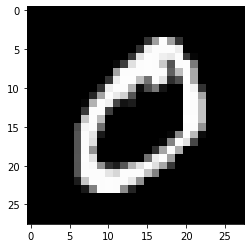

In [3]:
# visualize the samples
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [4]:
# This step creates the t-SNE transformation of the data
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
type(tsne)

sklearn.manifold._t_sne.TSNE

In [6]:
# creating a pandas dataframe from a numpy array
tsne_df = pd.DataFrame(
np.column_stack((transformed_data, targets[:3000])),
columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [7]:
tsne_df.head()

x          y  targets
0  -5.281551 -28.952768        5
1 -26.105896 -68.069321        0
2 -42.503582  35.580391        4
3  38.893967  26.663395        1
4 -14.770573  35.433247        9

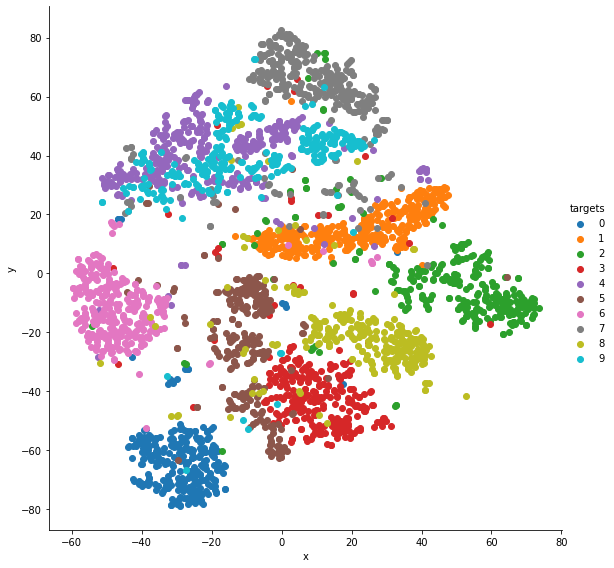

In [8]:
# we can plot it using seaborn and matplotlib
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [9]:
titanic_data = pd.read_csv('titanic_data.csv')

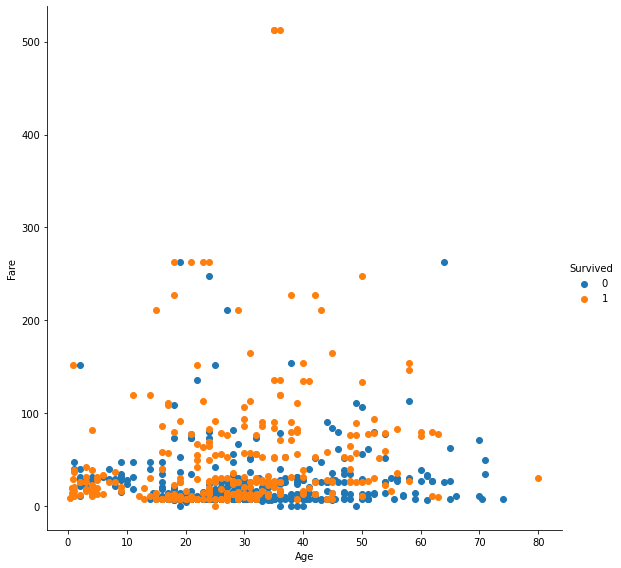

In [10]:
# plotting features from the titanic DataFrame using seaborn and matplotlib
grid = sns.FacetGrid(titanic_data, hue="Survived", height=8)
grid.map(plt.scatter, "Age", "Fare").add_legend()

**Cross-validation**

*cross-validation is a step in the process of building a machine learning model which helps us ensure that our models fit the data accurately and also ensures that we do not overfit*

In [11]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [12]:
df.shape

(1599, 12)

In [13]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [14]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        2  
1      9.8        2  
2      9.8        2  
3      9.8        3  
4      9.4        2

In [15]:
# Splitting can be done easily by the following chunk of code
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected # for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

**We will now train a decision tree model on the training set. For the decision tree model**

In [16]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=7)
# choose the columns you want to train on # these are the features for the model
cols = ['fixed acidity',
        'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
        'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# we test the accuracy of this model on the training set and the test set
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on # training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions )
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions )

In [18]:
# train & test accuracy with max_depth of 3
print(train_accuracy)

0.763


In [19]:
print(test_accuracy)

0.5676126878130217


In [20]:
# train & test accuracy with max_depth of 7
print(train_accuracy)
print(test_accuracy)

0.763
0.5676126878130217


In [21]:
# import scikit-learn tree and metrics
from sklearn import tree 
from sklearn import metrics
# import matplotlib and seaborn # for plotting
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

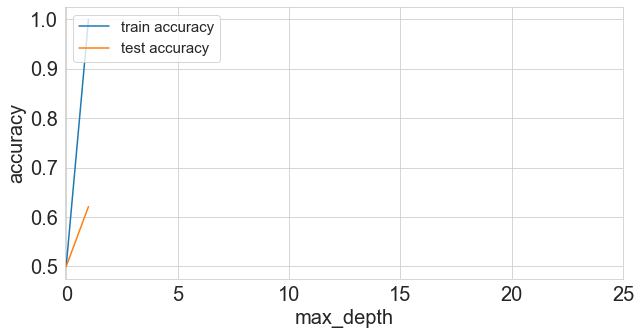

In [22]:
# this is our global size of label text # on the plots
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed # inside the notebook
%matplotlib inline
# initialize lists to store accuracies # for training and test data
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
# columns/features for training
# note that, this can be done outside # the loop
cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH',
    'sulphates', 'alcohol'
]
# fit the model on given features
clf.fit(df_train[cols], df_train.quality)
# create training & test predictions
train_predictions = clf.predict(df_train[cols]) 
test_predictions = clf.predict(df_test[cols])
# calculate training & test accuracies
train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions
)
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions )
# append accuracies
train_accuracies.append(train_accuracy) 
test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20)
plt.show()

**Occam’s razor**

*Occam's razor states that one should not try to complicate things that can be solved in a much simpler manner. In other words, the simplest solutions are the most generalizable solutions.*

**Cross-validation techniques**

k-fold cross-validation

stratified k-fold cross-validation

hold-out based validation

leave-one-out cross-validation

group k-fold cross-validation

In [23]:
# We can split any data into k-equal parts using KFold from scikit-learn
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a CSV file called train.csv 
    df = pd.read_csv("train.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)
    # initiate the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    # fill the new kfold column
    for fold, (trn_, val_) in enumerate(kf.split(X=df)): 
        df.loc[val_, 'kfold'] = fold
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

In [24]:
df_fold = ('train_folds.csv')
df_fold = pd.read_csv(df_fold)
df_fold.head()

PassengerId  Survived  Pclass  \
0           26         1       3   
1          156         0       1   
2          582         1       1   
3          139         0       3   
4          484         1       3   

                                                Name     Sex   Age  SibSp  \
0  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
1                        Williams, Mr. Charles Duane    male  51.0      0   
2  Thayer, Mrs. John Borland (Marian Longstreth M...  female  39.0      1   
3                                Osen, Mr. Olaf Elon    male  16.0      0   
4                             Turkula, Mrs. (Hedwig)  female  63.0      0   

   Parch    Ticket      Fare Cabin Embarked  kfold  
0      5    347077   31.3875   NaN        S      0  
1      1  PC 17597   61.3792   NaN        C      0  
2      1     17421  110.8833   C68        C      0  
3      0      7534    9.2167   NaN        S      0  
4      0      4134    9.5875   NaN        S      0

In [25]:
# The next important type of cross-validation is stratified k-fold
# Stratified k-fold cross-validation keeps the ratio of labels in each fold constant
# import pandas and model_selection module of scikit-learn
import pandas as pd
from sklearn import model_selection
if __name__ == "__main__":
# Training data is in a csv file called train.csv 
    df = pd.read_csv("train_1.csv")
# we create a new column called kfold and fill it with -1
    df["kfold"] = -1
    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True) # fetch targets
    y = df.target.values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
# fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)): 
        df.loc[v_, 'kfold'] = f
# save the new csv with kfold column
df.to_csv("train_folds.csv", index=False)

In [26]:
df_fold = ('train_folds.csv')
df_fold = pd.read_csv(df_fold)
df_fold.head()

PassengerId  target  Pclass                            Name     Sex   Age  \
0          740       0       3              Nankoff, Mr. Minko    male   NaN   
1          311       1       1  Hays, Miss. Margaret Bechstein  female  24.0   
2          745       1       3              Stranden, Mr. Juho    male  31.0   
3          635       0       3              Skoog, Miss. Mabel  female   9.0   
4          845       0       3             Culumovic, Mr. Jeso    male  17.0   

   SibSp  Parch             Ticket     Fare Cabin Embarked  kfold  
0      0      0             349218   7.8958   NaN        S      0  
1      0      0              11767  83.1583   C54        C      0  
2      0      0  STON/O 2. 3101288   7.9250   NaN        S      0  
3      3      2             347088  27.9000   NaN        S      0  
4      0      0             315090   8.6625   NaN        S      0

In [27]:
df

PassengerId  target  Pclass  \
0            740       0       3   
1            311       1       1   
2            745       1       3   
3            635       0       3   
4            845       0       3   
..           ...     ...     ...   
886          189       0       3   
887          706       0       2   
888          143       1       3   
889          453       0       1   
890          504       0       3   

                                                  Name     Sex   Age  SibSp  \
0                                   Nankoff, Mr. Minko    male   NaN      0   
1                       Hays, Miss. Margaret Bechstein  female  24.0      0   
2                                   Stranden, Mr. Juho    male  31.0      0   
3                                   Skoog, Miss. Mabel  female   9.0      3   
4                                  Culumovic, Mr. Jeso    male  17.0      0   
..                                                 ...     ...   ...    ...   
886                                   Bourke, Mr. John    male  40.0      1   
887     Morley, Mr. Henry Samuel ("Mr Henry Marshall")    male  39.0      0   
888  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
889                    Foreman, Mr. Benjamin Laventall    male  30.0      0   
890                     Laitinen, Miss. Kristina Sofia  female  37.0      0   

     Parch             Ticket     Fare Cabin Embarked  kfold  
0        0             349218   7.8958   NaN        S      0  
1        0              11767  83.1583   C54        C      0  
2        0  STON/O 2. 3101288   7.9250   NaN        S      0  
3        2             347088  27.9000   NaN        S      0  
4        0             315090   8.6625   NaN        S      0  
..     ...                ...      ...   ...      ...    ...  
886      1             364849  15.5000   NaN        Q      4  
887      0             250655  26.0000   NaN        S      4  
888      0   STON/O2. 3101279  15.8500   NaN        S      4  
889      0             113051  27.7500  C111        C      4  
890      0               4135   9.5875   NaN        S      4  

[891 rows x 13 columns]

In [28]:
df_fold.columns

Index(['PassengerId', 'target', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'kfold'],
      dtype='object')

Text(0, 0.5, 'count')

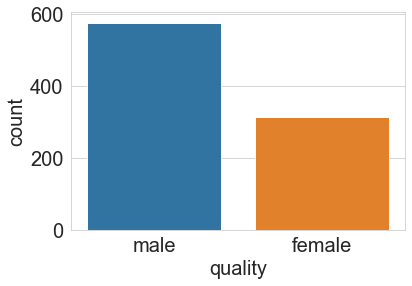

In [29]:
# Can I check the distribution of the titanic dataset?
b = sns.countplot(x='Sex', data=df_fold)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [30]:
df = pd.read_csv("winequality-red.csv",sep=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [31]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

Text(0, 0.5, 'count')

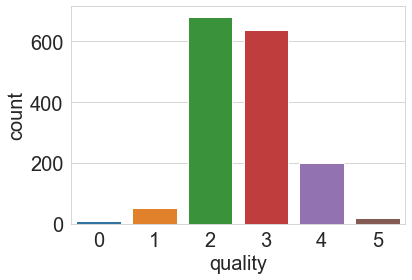

In [32]:
# For the wine dataset, let’s look at the distribution of labels.
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [33]:
# The rule is simple. If it’s a standard classification problem, choose stratified k-fold blindly.

*Suppose we have 1 million samples. A 5 fold cross-validation would mean training on 800k samples and validating on 200k. Depending on which algorithm we choose, training and even validation can be very expensive for a dataset which is of this size. In these cases, we can opt for a hold-out based validation*

In [34]:
# The process for creating the hold-out remains the same as stratified k-fold.
# Hold-out is also used very frequently with time-series data

In [35]:
# To use stratified k-fold for a regression problem
# we have first to divide the target into bins, 
#and then we can use stratified k-fold in the same way
#as for classification problems

In [36]:
# Let’s make a sample regression dataset and try to apply stratified k-fold 
#as shown in the following python snippet.
# stratified-kfold for regression
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn import model_selection

In [37]:
def create_folds(data):
# we create a new column called kfold and fill it with -1 
    data["kfold"] = -1

# the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)

# calculate the number of bins by Sturge's rule 
# I take the floor of the value, you can also
# just round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

# bin targets
    data.loc[:, "bins"] = pd.cut(
    data["target"], bins=num_bins, labels=False)

# initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
# note that, instead of targets, we use bins!
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

# drop the bins column
    data = data.drop("bins", axis=1) 

# return dataframe with folds 
    return data

if __name__ == "__main__":
# we create a sample dataset with 15000 samples 
# and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1 )

# create a dataframe out of our numpy arrays
df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
df.loc[:, "target"] = y

# create folds
df = create_folds(df)

/Users/peterokwukogu/anaconda3/envs/data_sci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [38]:
df.head()

f_0       f_1       f_2       f_3       f_4       f_5       f_6  \
0  0.516403 -0.011565  0.691453  0.533573  0.153572 -1.453948 -0.650023   
1  0.494470  0.905369 -0.833645  0.188573  0.340640 -1.384229 -1.033614   
2  0.824533 -0.703016  1.465662 -0.238156  0.305712 -1.566844 -1.124963   
3  1.140842  0.848726 -0.433882  1.698848  2.531109  1.092438  0.395081   
4 -0.244918  0.955350  0.435627 -0.123601  0.618288 -0.162415  2.084993   

        f_7       f_8       f_9  ...      f_92      f_93      f_94      f_95  \
0  0.084440  0.947874  0.160288  ...  0.978090 -0.503187 -0.193206 -1.489057   
1 -0.162166  1.480967 -0.584027  ... -0.163453 -1.295426 -0.517805  0.019611   
2 -0.198912 -1.644845  0.646959  ... -0.924920 -2.038153 -1.945466 -1.823869   
3  0.722906 -1.218199  0.774687  ...  1.058624  1.550650 -0.785612  0.582323   
4 -1.502657  0.212594  0.474800  ... -1.413210 -0.390258 -0.259421  0.291365   

       f_96      f_97      f_98      f_99      target  kfold  
0 -0.559370  0.427841 -0.119672 -0.569243  207.235254      0  
1 -0.597165  0.271891  0.173586 -0.298526 -237.533719      0  
2 -0.516309 -0.340466 -1.322842 -0.506202   56.875162      0  
3  0.000302 -0.393680  0.493742  0.579431  289.021811      0  
4 -0.228751  0.643779  0.150569 -0.935063   80.461107      0  

[5 rows x 102 columns]

In [39]:
df.shape

(15000, 102)

*Cross-validation is the first and most essential step when it comes to building machine learning models. If you want to do feature engineering, split your data first. If you're going to build models, split your data first. If you have a good cross-validation scheme in which validation data is representative of training and real-world data, you will be able to build a good machine learning model which is highly generalizable.*


*The types of cross-validation presented in this chapter can be applied to almost any machine learning problem. Still, you must keep in mind that cross-validation also depends a lot on the data and you might need to adopt new forms of cross-validation depending on your problem and data.*


*For example, let’s say we have a problem in which we would like to build a model to detect skin cancer from skin images of patients. Our task is to build a binary classifier which takes an input image and predicts the probability for it being benign or malignant.*


*In these kinds of datasets, you might have multiple images for the same patient in the training dataset. So, to build a good cross-validation system here, you must have stratified k-folds, but you must also make sure that patients in training data do not appear in validation data.* 

*Fortunately, scikit-learn offers a type of cross-validation known as GroupKFold. Here the patients can be considered as groups. But unfortunately, there is no way to combine GroupKFold with StratifiedKFold in scikit-learn.*

**Evaluation metrics**

In [40]:
# Accuracy
# Accuracy: It is one of the most straightforward metrics used in machine learning. 
#It defines how accurate your model is

# When we have an equal number of positive and negative samples in a binary classification metric, 
#we generally use accuracy, precision, recall and f1.

In [41]:
# Python code for calculating accuracy is also quite simple
def accuracy(y_true, y_pred): 
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
        # if prediction is equal to truth, increase the counter correct_counter += 1
        # return accuracy
        # which is correct predictions over the number of samples 
            return correct_counter / len(y_true)

In [42]:
# We can also calculate accuracy using scikit-learn
from sklearn import metrics

In [43]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [44]:
metrics.accuracy_score(l1, l2)

0.625

**Let’s look at implementations of precision**

In [45]:
def true_positive(y_true, y_pred): 
    """
    Function to calculate True Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true positives
    """


    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

In [46]:
def true_negative(y_true, y_pred): 
    """
    Function to calculate True Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of true negatives
    """


    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

In [47]:
def false_positive(y_true, y_pred): 
    """
    Function to calculate False Positives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1: 
            fp += 1
    return fp

In [48]:
def false_negative(y_true, y_pred): 
    """
    Function to calculate False Negatives 
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0: 
            fn += 1
    return fn

In [49]:
l1 = [0,1,1,1,0,0,0,1] 
l2 = [0,1,0,1,0,1,0,0]

In [50]:
true_positive(l1, l2)

2

In [51]:
false_positive(l1, l2)

1

In [52]:
false_negative(l1, l2)

2

In [53]:
true_negative(l1, l2)

3

In [54]:
# If we have to define accuracy using the terms described above, we can write:
# Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

In [55]:
# We can now quickly implement accuracy score using TP, TN, FP and FN in python. 
#Let’s call it accuracy_v2.

In [56]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn 
    :param y_true: list of true values
    :param y_pred: list of predicted values 
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred) 
    accuracy_score = (tp + tn) / (tp + tn + fp + fn) 
    return accuracy_score

**Precision**

In [57]:
# Precision = TP / (TP + FP)
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred) 
    precision = tp / (tp + fp)
    return precision

In [58]:
# Let’s try this implementation of precision.
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [59]:
precision(l1, l2)

0.6666666666666666

**Recall**

In [60]:
# Recall = TP / (TP + FN)
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred) 
    recall = tp / (tp + fn)
    return recall

In [61]:
# Let’s try this implementation of recall.
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

In [62]:
recall(l1, l2)

0.5

**Precision-recall curve**

In [63]:
# Before looking into the precision-recall curve, let’s assume two lists.
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,1,0,0,0,0,0,0,0,1, 0]

In [64]:
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844, 0.15952202, 0.03819563, 
          0.11639273, 0.079377, 0.08584789, 0.39095342, 0.27259048, 0.03447096, 0.04644807, 0.03543574,
          0.18521942, 0.18521942, 0.61977213, 0.33056815]

In [65]:
# So, y_true is our targets, and y_pred is the probability values for a sample being assigned a value of 1
# So, now, we look at probabilities in prediction instead of the predicted value (which is most of the time 
#calculated with a threshold at 0.5)

In [66]:
precisions = []
recalls = []
# how we assumed these thresholds is a long story
thresholds = [0.0490937, 0.05934905, 0.08584789, 0.11114267, 0.15952202,
              0.17554844, 0.27259048, 0.31620708, 0.39095342, 0.61977213,
              0.079377, 0.11639273, 0.18521942, 0.33056815]
# for every threshold, calculate predictions in binary # and append calculated precisions and recalls
# to their respective lists
for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction) 
    r = recall(y_true, temp_prediction) 
    precisions.append(p) 
    recalls.append(r)

Text(0, 0.5, 'Precision')

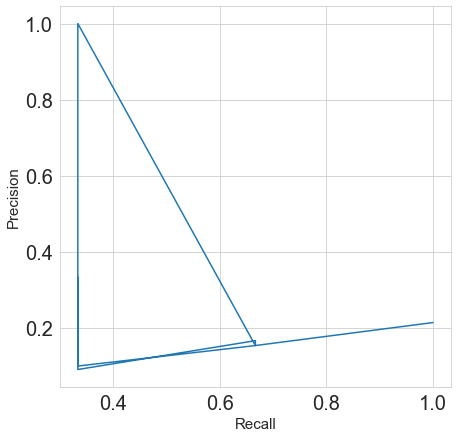

In [67]:
# Now, we can plot these values of precisions and recalls
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

**F1 score**

*F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall.*

In [68]:
# F1 = 2PR / (P + R)
# A little bit of mathematics will lead you to the following equation of F1 based on TP, FP and FN
# F1 = 2TP / (2TP + FP + FN)

In [69]:
# A Python implementation
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = 2 * p * r / (p + r) 
    return score

In [70]:
# Let’s see the results of this and compare it with scikit-learn
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [71]:
f1(y_true,y_pred)

0.5714285714285715

In [72]:
# And from scikit learn for the same lists
from sklearn import metrics
metrics.f1_score(y_true, y_pred)

0.5714285714285715

**TPR or True Positive Rate, which is the same as recall**

In [74]:
# TPR = TP / (TP + FN)
def tpr(y_true, y_pred):
    """
    Function to calculate tpr
    :param y_true: 
    list of true values :param y_pred: 
    list of predicted values 
    :return: tpr/recall
    """
    return recall(y_true, y_pred)
# TPR or recall is also known as sensitivity

**FPR or False Positive Rate**

In [77]:
# FPR = FP / (TN + FP)
def fpr(y_true, y_pred):
    """
    Function to calculate fpr
    :param y_true: list of true values 
    :param y_pred: list of predicted values 
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred) 
    return fp / (tn + fp)
# FPR is known as specificity or True Negative Rate or TNR

In [79]:
# Let’s calculate only two values, though: TPR and FPR

# empty lists to store tpr
# and fpr values
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [
    0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15,
    0.99
]

# handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)
    # append tpr and fpr to lists
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

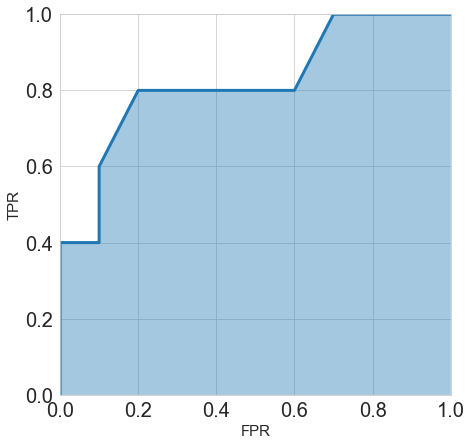

In [80]:
# Receiver Operating Characteristic (ROC)
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

*And if we calculate the area under this ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets*

*This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve. For this particular purpose, we will stick to the fantastic implementation by scikit-learn.*